Importing and cleaning data. We are dropping all non-criminal listings as well as offenses with under 300 occurances, as many of these either involve little to no threat to the general public or occur in extremely minimal numbers. The category of 'other offenses' was also dropped as it encompasses such a wide array of descriptions and poses difficulty in properly categorizing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

csvpath = "Resources/sfpd_incidents_2016.csv"
sfpd_df = pd.read_csv(csvpath)
sfpd_clean = sfpd_df[~sfpd_df['Category'].isin(['NON-CRIMINAL', 'OTHER OFFENSES','SECONDARY CODES','WARRANTS','SUICIDE','BRIBERY','EXTORTION','EXTORTION','FAMILY OFFENSES','LOITERING','SEX OFFENSES', 'NON FORCIBLE','BAD CHECKS','GAMBLING','PORNOGRAPHY/OBSCENE MAT','TREA'])]
sfpd_clean = sfpd_clean.dropna(how='any')
sfpd_clean = sfpd_clean.drop(['PdId'], axis = 1)
sfpd_clean["Month"] = sfpd_clean["Date"].str.rstrip('/').str.split('/').str[0]

#adding bins for time of day
time_min = pd.to_datetime(sfpd_clean["Time"])
time_clean = time_min.dt.hour
sfpd_clean['Hour'] = time_clean

bins = [0,8,17,24]
time_of_day = ["Morning", "Middle", "Night"]
pd.cut(sfpd_clean["Hour"], bins, labels=time_of_day).head()
sfpd_clean["Time of Day"] = pd.cut(sfpd_clean["Hour"], bins, labels=time_of_day)

sfpd_clean.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Hour,Time of Day
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",01,11,Middle
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",01,11,Middle
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",01,21,Night
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",01,10,Middle
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",01,22,Night


We want to visualize how many offenses are recorded per month for the entirety of 2016:

In [2]:
month_data = sfpd_clean[['Month','Category']]
month_datagrouped = month_data.groupby(['Month']).count()
month_datagrouped = month_datagrouped.sort_values('Category', ascending=False)

Text(0.5, 1.0, 'Recorded Offenses per Month')

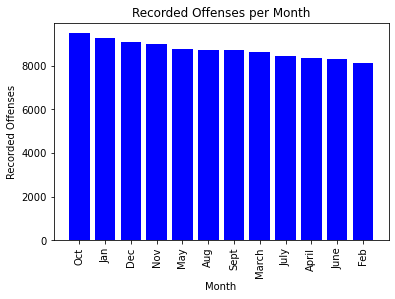

In [3]:
crime = month_datagrouped['Category']
month = ['Oct','Jan','Dec','Nov','May','Aug','Sept','March','July','April','June','Feb']
x = np.arange(len(month))
plt.bar(x, crime, color="b", align="center")
tick_locations = [value for value in x]
plt.xticks(tick_locations, month, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Recorded Offenses')
plt.title('Recorded Offenses per Month')

Visualizing how criminal offenses are distributed by weekday:

In [4]:
day_data = sfpd_clean[['DayOfWeek','Category']]
day_datagroup = day_data.groupby(['DayOfWeek']).count()
day_datagroup = day_datagroup.sort_values('Category', ascending=False)

Text(0.5, 1.0, 'Recorded Offenses per Day of the Week')

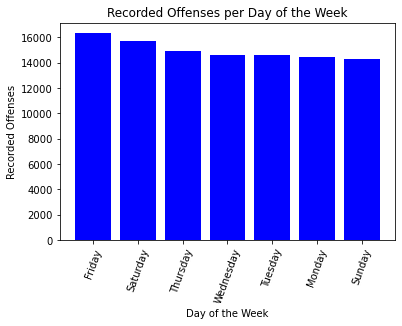

In [5]:
crime = day_datagroup['Category']
day = ['Friday','Saturday','Thursday','Wednesday','Tuesday','Monday','Sunday']
x_axis = np.arange(len(day))
plt.bar(x_axis, crime, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, day, rotation= 70)
plt.xlabel('Day of the Week')
plt.ylabel('Recorded Offenses')
plt.title('Recorded Offenses per Day of the Week')

Are certain crimes more frequent at certain times of day?

In [6]:
#insert charts showing categories of crime per time of day

How frequently is action taken and a crime 'resolved'?

In [7]:
sf_crime_res_df = sfpd_clean.loc[ :, ["Category", "Resolution"]]
sf_crime_res_df.head()
sf_crime_res_df["Resolution"].value_counts().head(15)

NONE                                      83160
ARREST, BOOKED                            20049
UNFOUNDED                                   817
JUVENILE BOOKED                             597
EXCEPTIONAL CLEARANCE                       200
CLEARED-CONTACT JUVENILE FOR MORE INFO       41
ARREST, CITED                                26
LOCATED                                      18
NOT PROSECUTED                               13
PSYCHOPATHIC CASE                             5
COMPLAINANT REFUSES TO PROSECUTE              2
Name: Resolution, dtype: int64

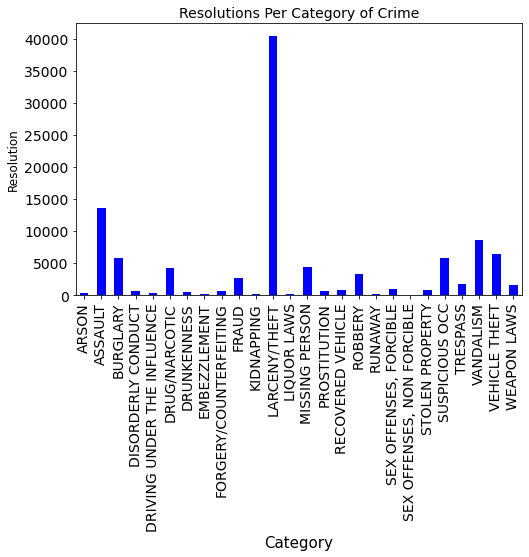

In [8]:
resolution_per_crime = sfpd_clean.groupby(["Category"]).count()["Resolution"]
plot_pandas = pd.DataFrame(resolution_per_crime)
plot_pandas = resolution_per_crime.plot.bar(figsize=(8,5), color='b',fontsize = 14)
plt.xlabel("Category",fontsize = 15),plt.ylabel("Resolution",fontsize = 12),plt.title("Resolutions Per Category of Crime",fontsize = 14)
plt.savefig('bar_plot1')
plt.show()

Do certain crimes appear more frequently at different times of day?

In [9]:
#insert bar chart demostrating categories of crime by time of day

In [12]:
morning_crime = sfpd_clean.loc[sfpd_clean["Time of Day"]== "Morning"]
middle_crime = sfpd_clean.loc[sfpd_clean["Time of Day"]== "Middle"]
night_crime = sfpd_clean.loc[sfpd_clean["Time of Day"]== "Night"]

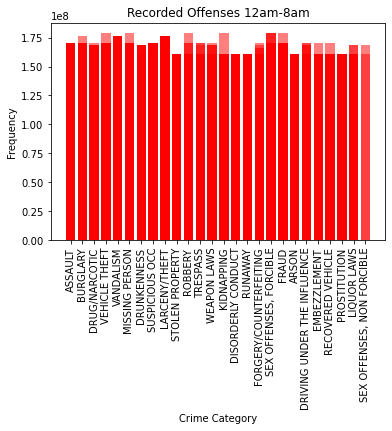

In [15]:
x_axis = morning_crime["Category"]
crime_count = morning_crime["IncidntNum"]
plt.bar(x_axis, crime_count, color='r', alpha=.5, align="center")
plt.xticks(rotation = "vertical")
plt.title("Recorded Offenses 12am-8am")
plt.xlabel("Crime Category")
plt.ylabel("Frequency")
plt.show()

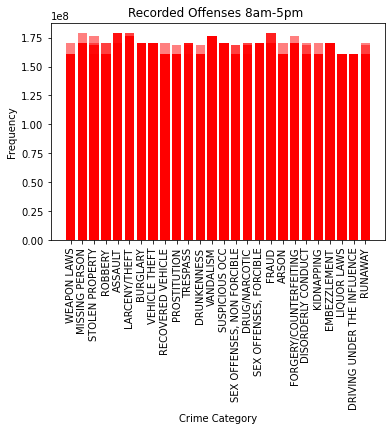

In [16]:
x_axis = middle_crime["Category"]
crime_count = middle_crime["IncidntNum"]
plt.bar(x_axis, crime_count, color='r', alpha=.5, align="center")
plt.xticks(rotation = "vertical")
plt.title("Recorded Offenses 8am-5pm ")
plt.xlabel("Crime Category")
plt.ylabel("Frequency")
plt.show()

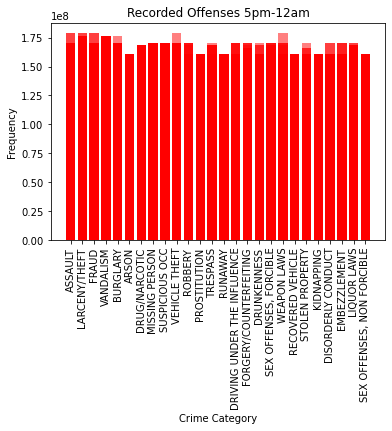

In [17]:
x_axis = night_crime["Category"]
crime_count = night_crime["IncidntNum"]
plt.bar(x_axis, crime_count, color='r', alpha=.5, align="center")
plt.xticks(rotation = "vertical")
plt.title("Recorded Offenses 5pm-12am")
plt.xlabel("Crime Category")
plt.ylabel("Frequency")
plt.show()

How many incidents involve more than one offense? To avoid inflating representation of criminal activity as we analyze further, we find how many incidents involve more than one offense:

In [18]:
incident_df = sfpd_clean[['IncidntNum', 'Category']]
groupedincidents = incident_df.groupby(['IncidntNum']).count()
multoffense = groupedincidents.loc[groupedincidents['Category']>1]
multiple = multoffense['Category'].count()
print(f'There were {multiple} individual incidents that involved more than one offense. A seperate dataframe to asses frequency and location of reported incidents will be used for further analysis.')

There were 13630 individual incidents that involved more than one offense. A seperate dataframe to asses frequency and location of reported incidents will be used for further analysis.
